# 回帰学習の基礎
- 直線モデルを作り、そのモデルの評価まで行う

In [61]:
#年齢と身長の人工データ
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#データ生成-------------------
np.random.seed(seed=1)#乱数固定
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
T = 170 - 108 * np.exp(-0.2 * X) \
+ 4 * np.random.randn(X_n)
#-----------------------------

#データセット
X_min = 4
X_max = 30

np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)


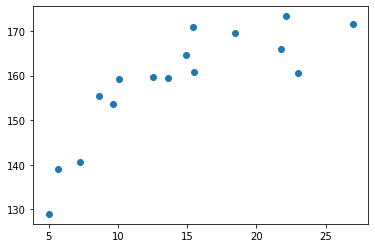

In [62]:
plt.scatter(X, T)

### 直線モデルと二乗誤差関数
$y(x)=w_{0}x +w_{1} $
- この式の形を直線モデルとする。
- このモデルの精度を高めるものに、誤差を用いる。
$$J = \frac{1}{N}\sum{n=0}{N-1}(y_{n}-t_{n})^2$$
- この値を「平均二乗誤差」という。

In [63]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse
    
#計算----------------------------------------------------
xn = 100 #等高線の解像度
w0_range = [-25,25]
w1_range = [120,170]
w0 = np.linspace(w0_range[0],w0_range[1],xn)
w1 = np.linspace(w1_range[0],w1_range[1],xn)
ww0, ww1 = np.meshgrid(w0,w1)
J = np.zeros((len(w0),len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1,i0] = mse_line(X, T, [w0[i0],w1[i1]])
J

array([[188152.24302206, 181302.2169775 , 174579.26993579, ...,
        115379.55398935, 120856.19122167, 126459.90745683],
       [187749.53959078, 180906.8717972 , 174191.28300646, ...,
        115690.60090288, 121174.59638617, 126785.67087231],
       [187347.34631153, 180512.03676892, 173803.80622916, ...,
        116002.15796843, 121493.51170269, 127111.94443982],
       ...,
       [151465.27801767, 145329.00231791, 139319.805621  , ...,
        147926.372431  , 154116.76000811, 160434.22658808],
       [151112.05933284, 144983.14188406, 138981.30343813, ...,
        148286.90409097, 154484.64991907, 160809.47475002],
       [150759.35080004, 144637.79160223, 138643.31140728, ...,
        148647.94590298, 154853.04998205, 161185.23306398]])

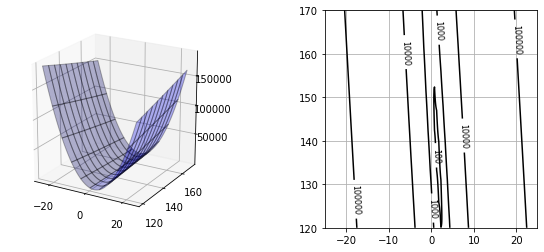

In [64]:
#表示----------------------------

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 30, colors='black',
                  levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)
plt.show()

## 勾配法で求める
- 上記の斜面上のある点に物体を置いたと仮定し、その物体がどこにとどまるかを計算する。
- これによって最小値が求まる。

繰り返し回数13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


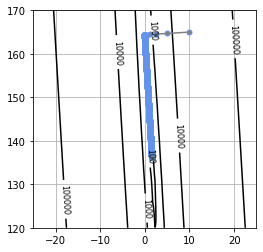

In [58]:
#勾配法----------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 *np.mean((y - t) * x)
    d_w1 = 2 *np.mean(y - t)
    return d_w0, d_w1

def fit_line_num(x, t):
    w_init = [10.0, 165.0] #初期パラメータ
    alpha = 0.001 #学習率
    tau_max = 100000 #繰り返しの最大数
    eps = 0.1 # 繰り返し処理を停止するしきい値の条件
    w_hist = np.zeros([tau_max, 2])
    w_hist[0, :] = w_init
    for tau in range(1, tau_max):
        dmse = dmse_line(x, t, w_hist[tau - 1])
        w_hist[tau, 0] = w_hist[tau - 1, 0] - alpha * dmse[0]
        w_hist[tau, 1] = w_hist[tau - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps:
            break
    w0 = w_hist[tau, 0]
    w1 = w_hist[tau, 1]
    w_hist = w_hist[:tau, :]
    return w0, w1, dmse, w_hist

#メイン
plt.figure(figsize=(4, 4))
#MSEの高等線表示
xn = 100 #等高線の解像度
w0_range = [-25,25]
w1_range = [120,170]
w0 = np.linspace(w0_range[0],w0_range[1],xn)
w1 = np.linspace(w1_range[0],w1_range[1],xn)
ww0, ww1 = np.meshgrid(w0,w1)
J = np.zeros((len(w0),len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1,i0] = mse_line(X, T, [w0[i0],w1[i1]])
cont = plt.contour(ww0, ww1, J, 30, colors='black',
                  levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)

#勾配法呼び出し
w0, w1, dMSE, W_history = fit_line_num(X, T)
#結果表示
print("繰り返し回数{0}".format(W_history.shape[0]))
print("W=[{0:.6f}, {1:.6f}]".format(w0, w1))
print("dMSE=[{0:.6f}, {1:.6f}]".format(dMSE[0], dMSE[1]))
print("MSE={0:.6f}".format(mse_line(X, T, [w0, w1])))
plt.plot(W_history[:, 0], W_history[:, 1], ".-",
        color="gray", markersize=10, markeredgecolor="cornflowerblue")
plt.show()

## 求めた解をプロットしてみる

w0=1.540,w1=136.176
SD=43.067cm


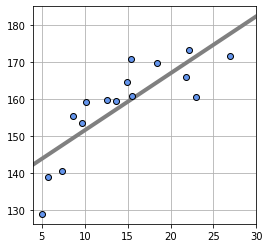

In [59]:
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)
plt.figure(figsize=(4, 4))
w = np.array([w0, w1])
mse = mse_line(X, T, W)
print("w0={0:.3f},w1={1:.3f}".format(w0, w1))
print("SD={0:.3f}cm".format(np.sqrt(mse)))
show_line(w)
plt.plot(X, T, marker="o", linestyle="None",
        color="cornflowerblue", markeredgecolor="black")
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()